In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import load_model
import pandas as pd
from pathlib import Path
import os
import scipy
from scipy import stats
from sklearn import preprocessing
import numpy as np
os.getcwd()

Using TensorFlow backend.


'/Users/rsfletch/github/bts/notebooks'

In [2]:
cols = ['Win', 'HPG', 'HPAB_p', 'spot', 'home', 'factor', 'BAT_HAND', 'PIT_HAND']
num_cols = len(cols)
num_feat = num_cols - 1
base = main_data.loc[main_data.year < 2018, cols]*1
basenp = base.to_numpy()
X = basenp[:,1:num_cols]
y = basenp[:,0]

NameError: name 'main_data' is not defined

In [25]:
model = Sequential()
model.add(Dense(50, input_dim=num_feat, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.fit(X, y, epochs=15, batch_size=128)

Epoch 1/15
2009607/2009607 [==============================] - 48s 24us/step - loss: 0.6338 - accuracy: 0.6617
Epoch 2/15
2009607/2009607 [==============================] - 52s 26us/step - loss: 0.6329 - accuracy: 0.6626
Epoch 3/15
 319872/2009607 [===>..........................] - ETA: 42s - loss: 0.6331 - accuracy: 0.6624

KeyboardInterrupt: 

array([[<AxesSubplot:title={'center':'EstProb'}>]], dtype=object)

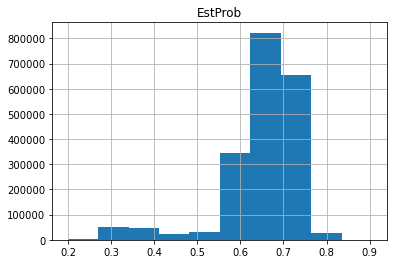

In [14]:
predictions = model.predict(X)
pd.DataFrame(predictions, columns=['EstProb']).hist()

In [15]:
base['EstProb'] = model.predict(X)
base['bin'] = pd.qcut(base['EstProb'], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

<AxesSubplot:xlabel='bin', ylabel='EstProb'>

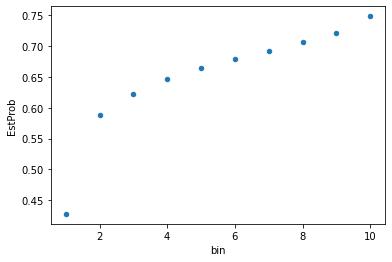

In [16]:
dots = base.groupby(['bin'])['EstProb'].agg('mean')
dots = dots.reset_index()
dots.plot.scatter('bin', 'EstProb')

In [52]:
# 'HPG', 'HPAB_p', 'spot', 'home', 'factor', 'BAT_HAND', 'PIT_HAND', 'avg_win', 'year'
cols = ['b_HPG', 'p_HPPA', 'spot', 'home', 'park_factor', 'BAT_HAND', 'PIT_HAND']
num_cols = len(cols)
num_feat = num_cols - 1

def prep_data(df):
    df[['home']] = df[['home']]*1
    X = df[cols]*1
    Y = df[['Win']]*1
    X_train = X[(df.year <= 2014)].to_numpy().astype('float') # (df.year >= 2000) & 
    Y_train = Y[(df.year <= 2014)].to_numpy().astype('float') # (df.year >= 2000) & 
    X_test = X[df.year >=  2015].to_numpy().astype('float')
    Y_test = Y[df.year >=  2015].to_numpy().astype('float')

    mean = np.mean(X_train, axis=0)
    X_train -= mean
    X_test -= mean
    std = np.std(X_train, axis=0)
    print(std)
    X_train /= std
    X_test /= std
    
    return X_train, Y_train, X_test, Y_test

In [53]:
main_data[cols].mean()

b_HPG          0.897649
p_HPPA         0.231778
spot           4.838348
home           0.499674
park_factor    1.001007
BAT_HAND       0.605559
PIT_HAND       0.710056
dtype: float64

In [54]:
processed = '../data/processed'
main_data = pd.read_pickle(Path(processed) / 'main_data.pkl')

main_data = main_data.dropna()

X_train, Y_train, X_test, Y_test = prep_data(main_data)

[0.26694738 0.03297662 2.51325424 0.49999986 0.05895024 0.48854816
 0.45400163]


In [57]:
counts = np.bincount(Y_train[:, 0])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(Y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

ValueError: object too deep for desired array

In [66]:
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
model.fit(X_train, Y_train, epochs=10, batch_size=64)
print('done')

Epoch 1/10
1971978/1971978 [==============================] - 50s 25us/step - loss: 0.6329 - accuracy: 0.6619
Epoch 2/10
1971978/1971978 [==============================] - 50s 26us/step - loss: 0.6318 - accuracy: 0.6635
Epoch 3/10
1971978/1971978 [==============================] - 50s 25us/step - loss: 0.6317 - accuracy: 0.6636
Epoch 4/10
1971978/1971978 [==============================] - 50s 25us/step - loss: 0.6316 - accuracy: 0.6637
Epoch 5/10
1971978/1971978 [==============================] - 50s 25us/step - loss: 0.6316 - accuracy: 0.6638
Epoch 6/10
1971978/1971978 [==============================] - 51s 26us/step - loss: 0.6316 - accuracy: 0.6638
Epoch 7/10
1971978/1971978 [==============================] - 50s 25us/step - loss: 0.6316 - accuracy: 0.6638
Epoch 8/10
1971978/1971978 [==============================] - 50s 25us/step - loss: 0.6315 - accuracy: 0.6638
Epoch 9/10
1971978/1971978 [==============================] - 50s 26us/step - loss: 0.6315 - accuracy: 0.6639
Epoch 10/1

In [69]:
model.summary()
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
158489/158489 [==============================] - 3s 16us/step
Accuracy: 64.27


In [70]:
predictions = model.predict(X_test)

In [71]:
test_data = main_data[main_data.year >=  2015]
test_data['EstProb'] = predictions

/Users/rsfletch/opt/anaconda3/envs/bts/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
test_data = test_data.set_index(['GAME_ID', 'BAT_ID'])

In [73]:
selection = test_data.groupby('Date')['EstProb'].nlargest(2).to_frame()

selection = selection.sort_values(
    by=['Date', 'EstProb', 'GAME_ID'], ascending=[True, False, True])

selection['pick_order'] = selection.groupby(['Date']).cumcount()+1
selection.to_pickle('../data/processed/selection_data.pkl')

In [74]:
interim = '../data/interim'
processed = '../data/processed'

hits = pd.read_pickle(Path(interim) / 'hits.pkl')

# selection_data = selections.merge(hits, on =['GAME_ID', 'BAT_ID'])
selection_data = selection.merge(main_data, on =['GAME_ID', 'BAT_ID'])
selection_data = selection_data.set_index(['Date', 'pick_order'])

selection_data.to_pickle(Path(processed) / 'selection_data.pkl')